# BCAUSS

__Reference__: [Gino Tesei et al, Learning end-to-end patient representations through self-supervised covariate balancing for causal treatment effect estimation, Journal of Biomedical Informatics 2023](https://www.sciencedirect.com/science/article/pii/S1532046423000606/pdfft?md5=923768a5e1b27765e9da9ac13c0477aa&pid=1-s2.0-S1532046423000606-main.pdf)

## BCAUSS on IHDP 

In [1]:
from causalforge.model import Model , PROBLEM_TYPE
from causalforge.data_loader import DataLoader 

# load IHDP dataset 
r = DataLoader.get_loader('IHDP').load()
X_tr, T_tr, YF_tr, YCF_tr, mu_0_tr, mu_1_tr, X_te, T_te, YF_te, YCF_te, mu_0_te, mu_1_te = r

# model 
params={}
params['input_dim'] = X_tr.shape[1] 
    
    
bcauss = Model.create_model("bcauss",
                               params,
                               problem_type=PROBLEM_TYPE.CAUSAL_TREATMENT_EFFECT_ESTIMATION, 
                               multiple_treatments=False)

bcauss.model.summary()

2023-05-16 14:38:25.704992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-16 14:38:32.547153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 200)          5200        ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 200)          40200       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 200)          40200       ['dense_1[0][0]']                
                                                                                              

 tf.concat_1 (TFOpLambda)       (None, 25)           0           ['tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
          

 )                                                                'tf.math.square_1[0][0]']       
                                                                                                  
 tf.math.squared_difference (TF  (25,)               0           ['tf.convert_to_tensor_2[0][0]', 
 OpLambda)                                                        'tf.cast[0][0]']                
                                                                                                  
 tf.math.reduce_sum_1 (TFOpLamb  ()                  0           ['tf.math.multiply[0][0]']       
 da)                                                                                              
                                                                                                  
 tf.math.reduce_sum_2 (TFOpLamb  ()                  0           ['tf.math.multiply_1[0][0]']     
 da)                                                                                              
          

In [2]:
from causalforge.metrics import eps_ATE_diff, PEHE_with_ite
import numpy as np

experiment_ids = [1,10,400]

eps_ATE_tr, eps_ATE_te = [], []
eps_PEHE_tr, eps_PEHE_te = [] , [] 



for idx in experiment_ids:    
    t_tr, y_tr, x_tr, mu0tr, mu1tr = T_tr[:,idx] , YF_tr[:,idx], X_tr[:,:,idx], mu_0_tr[:,idx], mu_1_tr[:,idx] 
    t_te, y_te, x_te, mu0te, mu1te = T_te[:,idx] , YF_te[:,idx], X_te[:,:,idx], mu_0_te[:,idx], mu_1_te[:,idx]  
    
    
    # Train your causal method on train-set ...
    bcauss.fit(x_tr,t_tr,y_tr)

    # Validate your method test-set ... 
    ATE_truth_tr = (mu1tr - mu0tr).mean()
    ATE_truth_te = (mu1te - mu0te).mean()
    
    ITE_truth_tr = (mu1tr - mu0tr)
    ITE_truth_te = (mu1te - mu0te)
    
    eps_ATE_tr.append( eps_ATE_diff( bcauss.predict_ate(x_tr,t_tr,y_tr), ATE_truth_tr) )
    eps_ATE_te.append( eps_ATE_diff( bcauss.predict_ate(x_te,t_te,y_te), ATE_truth_te) )
    
    eps_PEHE_tr.append( PEHE_with_ite( bcauss.predict_ite(x_tr), ITE_truth_tr, sqrt=True))
    eps_PEHE_te.append( PEHE_with_ite( bcauss.predict_ite(x_te), ITE_truth_te , sqrt=True))
        

Epoch 1/500


/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 547.6672 - val_loss: 152.1803 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 34ms/step - loss: 536.0317 - val_loss: 147.6225 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 520.6493 - val_loss: 142.3976 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 502.9591 - val_loss: 136.9129 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 38ms/step - loss: 484.2097 - val_loss: 131.4725 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 465.5842 - val_loss: 126.2357 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 39ms/step - loss: 447.4870 - val_loss: 121.1741 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 38ms/step - loss: 429.9871 - val_loss: 116.3077 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 38ms/ste

Epoch 67/500
1/1 [==============================] - 0s 34ms/step - loss: 190.6481 - val_loss: 50.7799 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 34ms/step - loss: 189.5290 - val_loss: 50.4689 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 33ms/step - loss: 188.4080 - val_loss: 50.1509 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 33ms/step - loss: 187.2767 - val_loss: 49.8294 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 32ms/step - loss: 186.1448 - val_loss: 49.5009 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 35ms/step - loss: 185.0201 - val_loss: 49.1708 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 32ms/step - loss: 183.9009 - val_loss: 48.8480 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 33ms/step - loss: 182.7794 - val_loss: 48.5313 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================

1/1 [==============================] - 0s 44ms/step - loss: 136.1007 - val_loss: 39.3087 - lr: 1.0000e-05
Epoch 136/500
1/1 [==============================] - 0s 39ms/step - loss: 135.6247 - val_loss: 39.2531 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 40ms/step - loss: 135.1624 - val_loss: 39.2015 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 55ms/step - loss: 134.7093 - val_loss: 39.1539 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 43ms/step - loss: 134.2684 - val_loss: 39.1090 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 43ms/step - loss: 133.8393 - val_loss: 39.0660 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 38ms/step - loss: 133.4219 - val_loss: 39.0268 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 36ms/step - loss: 133.0151 - val_loss: 38.9903 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 31ms/step - loss: 118.0460 - val_loss: 39.0247 - lr: 1.0000e-05
Epoch 204/500
1/1 [==============================] - 0s 29ms/step - loss: 117.8520 - val_loss: 39.0446 - lr: 1.0000e-05
Epoch 205/500
1/1 [==============================] - 0s 31ms/step - loss: 117.6588 - val_loss: 39.0624 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 47ms/step - loss: 117.4658 - val_loss: 39.0831 - lr: 1.0000e-05
***************************** elapsed_time is:  8.97005581855774
3/3 [==============================] - 0s 2ms/step
Epoch 1/500


/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 890ms/step - loss: 523.5383 - val_loss: 105.3231 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 33ms/step - loss: 496.5117 - val_loss: 99.5787 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 466.3900 - val_loss: 94.3524 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 34ms/step - loss: 435.8717 - val_loss: 89.1768 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 36ms/step - loss: 405.2056 - val_loss: 83.9088 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 36ms/step - loss: 374.7744 - val_loss: 78.7719 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 34ms/step - loss: 346.0509 - val_loss: 74.0781 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 33ms/step - loss: 320.2856 - val_loss: 69.9237 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 67.4603 - val_loss: 25.1817 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 32ms/step - loss: 66.9151 - val_loss: 25.0704 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 34ms/step - loss: 66.3889 - val_loss: 24.9668 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 32ms/step - loss: 65.8859 - val_loss: 24.8687 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 32ms/step - loss: 65.4042 - val_loss: 24.7741 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 35ms/step - loss: 64.9444 - val_loss: 24.6813 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 33ms/step - loss: 64.5069 - val_loss: 24.5961 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 36ms/step - loss: 64.0916 - val_loss: 24.5180 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================] - 0s 32ms/step - lo

1/1 [==============================] - 0s 33ms/step - loss: 51.2476 - val_loss: 22.6202 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 33ms/step - loss: 51.1273 - val_loss: 22.6137 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 33ms/step - loss: 51.0083 - val_loss: 22.6066 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 34ms/step - loss: 50.8899 - val_loss: 22.5984 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 37ms/step - loss: 50.7728 - val_loss: 22.5913 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 34ms/step - loss: 50.6569 - val_loss: 22.5827 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 35ms/step - loss: 50.5417 - val_loss: 22.5747 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0s 35ms/step - loss: 50.4273 - val_loss: 22.5691 - lr: 1.0000e-05
Epoch 144/500
1/1 [==============================] - 0s 33ms/s

Epoch 205/500
1/1 [==============================] - 0s 30ms/step - loss: 44.6946 - val_loss: 22.3161 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 31ms/step - loss: 44.6178 - val_loss: 22.3147 - lr: 1.0000e-05
Epoch 207/500
1/1 [==============================] - 0s 32ms/step - loss: 44.5412 - val_loss: 22.3146 - lr: 1.0000e-05
Epoch 208/500
1/1 [==============================] - 0s 36ms/step - loss: 44.4645 - val_loss: 22.3115 - lr: 1.0000e-05
Epoch 209/500
1/1 [==============================] - 0s 33ms/step - loss: 44.3884 - val_loss: 22.3115 - lr: 1.0000e-05
Epoch 210/500
1/1 [==============================] - 0s 34ms/step - loss: 44.3129 - val_loss: 22.3065 - lr: 1.0000e-05
Epoch 211/500
1/1 [==============================] - 0s 32ms/step - loss: 44.2378 - val_loss: 22.3059 - lr: 1.0000e-05
Epoch 212/500
1/1 [==============================] - 0s 36ms/step - loss: 44.1631 - val_loss: 22.3032 - lr: 1.0000e-05
Epoch 213/500
1/1 [=============================

Epoch 274/500
1/1 [==============================] - 0s 30ms/step - loss: 39.9956 - val_loss: 22.2849 - lr: 1.0000e-05
Epoch 275/500
1/1 [==============================] - 0s 30ms/step - loss: 39.9357 - val_loss: 22.2847 - lr: 1.0000e-05
Epoch 276/500
1/1 [==============================] - 0s 32ms/step - loss: 39.8759 - val_loss: 22.2938 - lr: 1.0000e-05
Epoch 277/500
1/1 [==============================] - 0s 32ms/step - loss: 39.8161 - val_loss: 22.2913 - lr: 1.0000e-05
Epoch 278/500
1/1 [==============================] - 0s 31ms/step - loss: 39.7565 - val_loss: 22.2997 - lr: 1.0000e-05
Epoch 279/500
1/1 [==============================] - 0s 29ms/step - loss: 39.6969 - val_loss: 22.2984 - lr: 1.0000e-05
Epoch 280/500
1/1 [==============================] - 0s 33ms/step - loss: 39.6374 - val_loss: 22.3077 - lr: 1.0000e-05
Epoch 281/500
1/1 [==============================] - 0s 31ms/step - loss: 39.5780 - val_loss: 22.3052 - lr: 1.0000e-05
Epoch 282/500
1/1 [=============================

/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 838ms/step - loss: 684.7468 - val_loss: 200.6950 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 36ms/step - loss: 556.0919 - val_loss: 168.3081 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 450.5397 - val_loss: 142.7722 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 37ms/step - loss: 372.7061 - val_loss: 126.0552 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 38ms/step - loss: 320.7877 - val_loss: 114.3463 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 38ms/step - loss: 282.2371 - val_loss: 105.0519 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 37ms/step - loss: 250.6492 - val_loss: 97.1484 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 33ms/step - loss: 223.8774 - val_loss: 90.2953 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 40ms/st

1/1 [==============================] - 0s 36ms/step - loss: 25.1468 - val_loss: 19.5667 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 42ms/step - loss: 24.8817 - val_loss: 19.4757 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 38ms/step - loss: 24.6258 - val_loss: 19.3894 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 40ms/step - loss: 24.3783 - val_loss: 19.3070 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 38ms/step - loss: 24.1395 - val_loss: 19.2271 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 39ms/step - loss: 23.9105 - val_loss: 19.1494 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 39ms/step - loss: 23.6901 - val_loss: 19.0735 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 36ms/step - loss: 23.4789 - val_loss: 18.9992 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================] - 0s 40ms/step - lo

1/1 [==============================] - 0s 46ms/step - loss: 18.1959 - val_loss: 17.0218 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 43ms/step - loss: 18.1589 - val_loss: 17.0072 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 39ms/step - loss: 18.1224 - val_loss: 16.9917 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 36ms/step - loss: 18.0865 - val_loss: 16.9772 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 37ms/step - loss: 18.0512 - val_loss: 16.9626 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 35ms/step - loss: 18.0162 - val_loss: 16.9488 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 36ms/step - loss: 17.9816 - val_loss: 16.9352 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0s 35ms/step - loss: 17.9474 - val_loss: 16.9212 - lr: 1.0000e-05
Epoch 144/500
1/1 [==============================] - 0s 38ms/s

Epoch 205/500
1/1 [==============================] - 0s 46ms/step - loss: 16.4200 - val_loss: 16.3454 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 42ms/step - loss: 16.4016 - val_loss: 16.3389 - lr: 1.0000e-05
Epoch 207/500
1/1 [==============================] - 0s 40ms/step - loss: 16.3832 - val_loss: 16.3313 - lr: 1.0000e-05
Epoch 208/500
1/1 [==============================] - 0s 45ms/step - loss: 16.3649 - val_loss: 16.3252 - lr: 1.0000e-05
Epoch 209/500
1/1 [==============================] - 0s 41ms/step - loss: 16.3467 - val_loss: 16.3176 - lr: 1.0000e-05
Epoch 210/500
1/1 [==============================] - 0s 44ms/step - loss: 16.3285 - val_loss: 16.3117 - lr: 1.0000e-05
Epoch 211/500
1/1 [==============================] - 0s 40ms/step - loss: 16.3105 - val_loss: 16.3039 - lr: 1.0000e-05
Epoch 212/500
1/1 [==============================] - 0s 43ms/step - loss: 16.2924 - val_loss: 16.2972 - lr: 1.0000e-05
Epoch 213/500
1/1 [=============================

Epoch 274/500
1/1 [==============================] - 0s 45ms/step - loss: 15.3285 - val_loss: 15.9745 - lr: 1.0000e-05
Epoch 275/500
1/1 [==============================] - 0s 40ms/step - loss: 15.3151 - val_loss: 15.9691 - lr: 1.0000e-05
Epoch 276/500
1/1 [==============================] - 0s 37ms/step - loss: 15.3017 - val_loss: 15.9649 - lr: 1.0000e-05
Epoch 277/500
1/1 [==============================] - 0s 39ms/step - loss: 15.2883 - val_loss: 15.9597 - lr: 1.0000e-05
Epoch 278/500
1/1 [==============================] - 0s 45ms/step - loss: 15.2749 - val_loss: 15.9553 - lr: 1.0000e-05
Epoch 279/500
1/1 [==============================] - 0s 41ms/step - loss: 15.2617 - val_loss: 15.9502 - lr: 1.0000e-05
Epoch 280/500
1/1 [==============================] - 0s 37ms/step - loss: 15.2485 - val_loss: 15.9455 - lr: 1.0000e-05
Epoch 281/500
1/1 [==============================] - 0s 36ms/step - loss: 15.2354 - val_loss: 15.9403 - lr: 1.0000e-05
Epoch 282/500
1/1 [=============================

Epoch 343/500
1/1 [==============================] - 0s 37ms/step - loss: 14.5059 - val_loss: 15.6972 - lr: 1.0000e-05
Epoch 344/500
1/1 [==============================] - 0s 36ms/step - loss: 14.4952 - val_loss: 15.6952 - lr: 1.0000e-05
Epoch 345/500
1/1 [==============================] - 0s 36ms/step - loss: 14.4845 - val_loss: 15.6912 - lr: 1.0000e-05
Epoch 346/500
1/1 [==============================] - 0s 36ms/step - loss: 14.4739 - val_loss: 15.6885 - lr: 1.0000e-05
Epoch 347/500
1/1 [==============================] - 0s 34ms/step - loss: 14.4634 - val_loss: 15.6846 - lr: 1.0000e-05
Epoch 348/500
1/1 [==============================] - 0s 37ms/step - loss: 14.4529 - val_loss: 15.6822 - lr: 1.0000e-05
Epoch 349/500
1/1 [==============================] - 0s 37ms/step - loss: 14.4425 - val_loss: 15.6779 - lr: 1.0000e-05
Epoch 350/500
1/1 [==============================] - 0s 34ms/step - loss: 14.4322 - val_loss: 15.6761 - lr: 1.0000e-05
Epoch 351/500
1/1 [=============================

Epoch 412/500
1/1 [==============================] - 0s 36ms/step - loss: 13.8381 - val_loss: 15.5253 - lr: 1.0000e-05
Epoch 413/500
1/1 [==============================] - 0s 44ms/step - loss: 13.8292 - val_loss: 15.5225 - lr: 1.0000e-05
Epoch 414/500
1/1 [==============================] - 0s 38ms/step - loss: 13.8203 - val_loss: 15.5218 - lr: 1.0000e-05
Epoch 415/500
1/1 [==============================] - 0s 39ms/step - loss: 13.8114 - val_loss: 15.5186 - lr: 1.0000e-05
Epoch 416/500
1/1 [==============================] - 0s 39ms/step - loss: 13.8026 - val_loss: 15.5174 - lr: 1.0000e-05
Epoch 417/500
1/1 [==============================] - 0s 43ms/step - loss: 13.7937 - val_loss: 15.5143 - lr: 1.0000e-05
Epoch 418/500
1/1 [==============================] - 0s 43ms/step - loss: 13.7849 - val_loss: 15.5133 - lr: 1.0000e-05
Epoch 419/500
1/1 [==============================] - 0s 41ms/step - loss: 13.7761 - val_loss: 15.5103 - lr: 1.0000e-05
Epoch 420/500
1/1 [=============================

Epoch 481/500
1/1 [==============================] - 0s 37ms/step - loss: 13.2679 - val_loss: 15.3989 - lr: 1.0000e-05
Epoch 482/500
1/1 [==============================] - 0s 32ms/step - loss: 13.2602 - val_loss: 15.3993 - lr: 1.0000e-05
Epoch 483/500
1/1 [==============================] - 0s 35ms/step - loss: 13.2527 - val_loss: 15.3962 - lr: 1.0000e-05
Epoch 484/500
1/1 [==============================] - 0s 33ms/step - loss: 13.2450 - val_loss: 15.3958 - lr: 1.0000e-05
Epoch 485/500
1/1 [==============================] - 0s 33ms/step - loss: 13.2374 - val_loss: 15.3929 - lr: 1.0000e-05
Epoch 486/500
1/1 [==============================] - 0s 32ms/step - loss: 13.2297 - val_loss: 15.3925 - lr: 1.0000e-05
Epoch 487/500
1/1 [==============================] - 0s 32ms/step - loss: 13.2221 - val_loss: 15.3902 - lr: 1.0000e-05
Epoch 488/500
1/1 [==============================] - 0s 32ms/step - loss: 13.2146 - val_loss: 15.3898 - lr: 1.0000e-05
Epoch 489/500
1/1 [=============================

## Results 

In [3]:
import pandas as pd 

pd.DataFrame([[np.mean(eps_ATE_tr),np.mean(eps_ATE_te),np.mean(eps_PEHE_tr),np.mean(eps_PEHE_te)]],
             columns=['eps_ATE_tr','eps_ATE_te','eps_PEHE_tr','eps_PEHE_te'], 
             index=['BCAUSS'])

,eps_ATE_tr,eps_ATE_te,eps_PEHE_tr,eps_PEHE_te
BCAUSS,0.067121,0.084479,0.567214,0.510539


## ITE distribution: learned vs. ground truth 

### Learned 

3/3 [==============================] - 0s 2ms/step


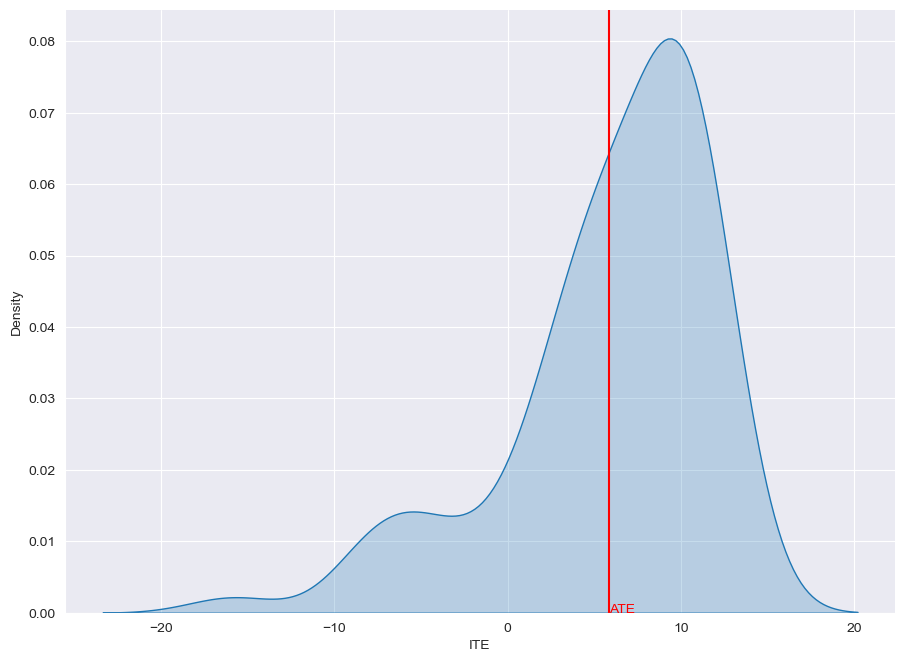

In [4]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(bcauss.predict_ite(x_te))

### Ground Truth 

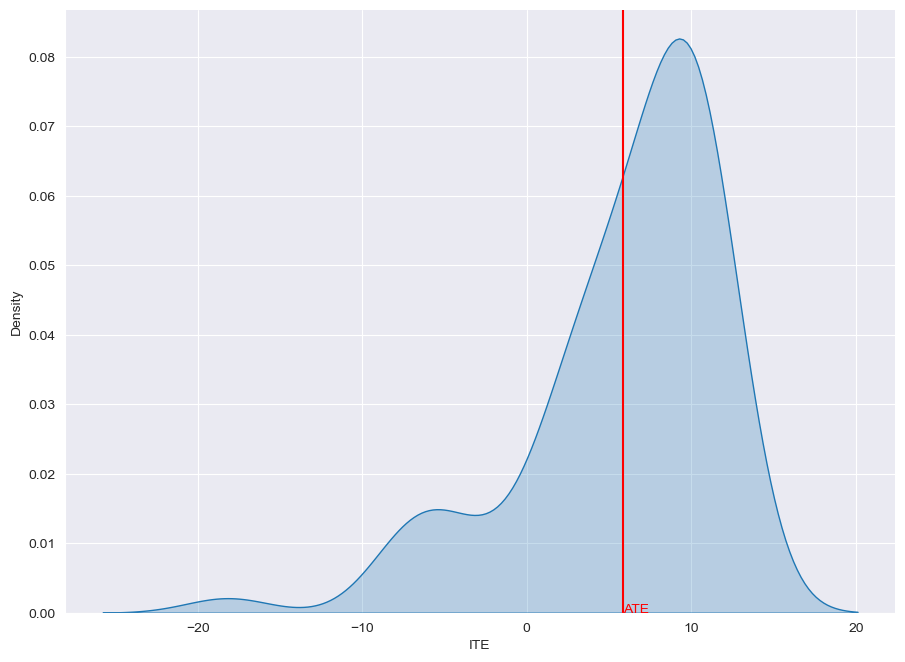

In [5]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(ITE_truth_te)